In [95]:
"""
This is one way of implementing the algorithm. Feel free to implement the functions in another way.
This way of implementing keeps the datatype to be pandas dataframe or pandas series (pretty much the same thing...)
through the entire code. Maybe look/Users/jakobtolstrup/Downloads/KmeansTemplate (3).py into numpy arrays if you want to implement it differently.

Plotting the distribution and inspecting pandas dataframes can be easier to understand in a ipynb.
Feel free to copy this code into Jupyter Notebook or a Google Colab.
I will show you my implementation in a jupyter notebook at the end of the class.
"""

import random
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('geyserData.csv') # Read in data as dataframe
df = df.reset_index(drop=True) # Remove the index from the file
df['class'] = 1 # Assign all points to class 1
df['eruptions'] = df['eruptions'] / max(df['eruptions']) # Normalize eruptions
df['waiting'] = df['waiting'] / max(df['waiting']) # Normalize waiting

display(df) # Display the dataframe

,eruptions,waiting,class
0,0.705882,0.822917,1
1,0.352941,0.562500,1
2,0.653529,0.770833,1
3,0.447647,0.645833,1
4,0.888824,0.885417,1
...,...,...,...
267,0.807255,0.843750,1
268,0.421569,0.479167,1
269,0.866078,0.937500,1
270,0.356275,0.479167,1


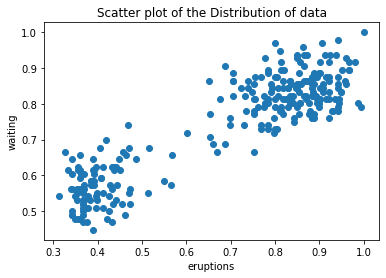

In [97]:
plt.title('Scatter plot of the Distribution of data')   #
plt.scatter(df['eruptions'],df['waiting'])              # Visualizing the distribution
#put the label eruption and waiting on the x and y axis
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()   

In [98]:
def initializeMeans(df):
    """
    Intialize the means by randomly taking two points from the dataframe. Hint: check the function 'random.randint'
    return two pandas dataframes (or pandas series) with mean1 and mean2
    """ 

    #randomly select two points from the dataframe
    mean1 = df.iloc[random.randint(0, len(df)-1)]
    mean2 = df.iloc[random.randint(0, len(df)-1)]
    
    return mean1, mean2 

initializeMeans(df)


(eruptions    0.784314
 waiting      0.885417
 class        1.000000
 Name: 178, dtype: float64,
 eruptions    0.516275
 waiting      0.677083
 class        1.000000
 Name: 83, dtype: float64)

In [99]:
import math

#create a helper function that calulates the euclidean distance between two points
def euclideanDistHelper(point1, point2):
    return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

def euclideanDist(df,pointIDX,mean1,mean2):

    dist1 = euclideanDistHelper(df.iloc[pointIDX], mean1)
    dist2 = euclideanDistHelper(df.iloc[pointIDX], mean2)
    
    lowest = min(dist1, dist2)

    if dist1 == lowest:
        df.loc[pointIDX, 'class'] = 0
    else:
        df.loc[pointIDX, 'class'] = 1

    return df

m1, m2 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2)
print(b)

     eruptions   waiting  class
0     0.705882  0.822917      1
1     0.352941  0.562500      1
2     0.653529  0.770833      1
3     0.447647  0.645833      1
4     0.888824  0.885417      1
..         ...       ...    ...
267   0.807255  0.843750      1
268   0.421569  0.479167      1
269   0.866078  0.937500      1
270   0.356275  0.479167      1
271   0.875882  0.770833      1

[272 rows x 3 columns]


In [103]:
def updateMean(df):
    """
    df is the dataframe of points containing the assigned classes
    return updated mean1 and mean2 based on the value in column 'class'. mean1 and mean2 should still be pandas dataframes (or pandas series)
    """
    


    mean1 = df[df['class'] == 0].mean()
    mean2 = df[df['class'] == 1].mean()

    return mean1, mean2

display(updateMean(df))

(eruptions    0.842812
waiting      0.833872
class        0.000000
dtype: float64, eruptions    0.401693
waiting      0.569196
class        1.000000
dtype: float64)


In [101]:
def Kmeans(df,iterations):
    """
    When you have implemented the three functions this function should work and run the Kmeans algorithm!
    """

    mean1,mean2 = initializeMeans(df)

    for iteration in range(iterations): # Change this when implementing how many times it should recalculate the mean

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2)
            
        mean1,mean2 = updateMean(df)

    return df,mean1,mean2

df,mean1,mean2 = Kmeans(df,5)

Iteration 0/0
Iteration 1/1
Iteration 2/2
Iteration 3/3
Iteration 4/4


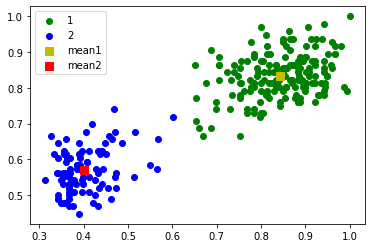

In [102]:
plt.clf()
plt.scatter(df.loc[df['class'] == 0]['eruptions'],df.loc[df['class'] == 0]['waiting'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 1]['eruptions'],df.loc[df['class'] == 1]['waiting'],color='b',label='2')  #
                                                                                                            #
plt.scatter(mean1['eruptions'],mean1['waiting'],s=70,label='mean1',marker='s',color='y')                    # Visualizing the final class distribution
plt.scatter(mean2['eruptions'],mean2['waiting'],s=70,label='mean2',marker='s',color='r')                    #
                                                                                                            #
plt.legend()                                                                                                #
plt.show()    